In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine('sqlite:///hawaii.sqlite')

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) -dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=["date", "precipitation"])
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [11]:
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-24           0.08
 2016-08-25           0.08
 2016-08-26           0.00
 2016-08-27           0.00
 2016-08-28           0.01
 2016-08-29           0.00
 2016-08-30           0.00
 2016-08-31           0.13
 2016-09-01           0.00
 2016-09-02           0.00
 2016-09-03           0.00
 2016-09-04           0.03
 2016-09-05            NaN
 2016-09-06            NaN
 2016-09-07           0.05
 2016-09-08           0.00
 2016-09-09           0.03
 2016-09-10           0.00
 2016-09-11           0.05
 2016-09-12           0.00
 2016-09-13           0.02
 2016-09-14           1.32
 2016-09-15           0.42
 2016-09-16           0.06
 2016-09-17           0.05
 2016-09-18           0.00
 2016-09-19           0.00
 2016-09-20           0.00
 2016-09-21           0.00
 2016-09-22           0.02
 2016-09-23           0.00
 2016-09-24           0.00
 2016-09-25           0.00
 2016-09-26           0.06
 2016-09-27           0.02
 

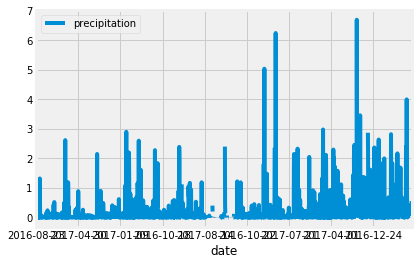

In [12]:
df.plot()

In [13]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
session.query()

In [15]:
session.query(func.count(Station.station))

In [16]:
session.query(func.count(Station.station)).all()

[(9)]

In [17]:
session.query()

In [18]:
session.query(Measurement.station, func.count(Measurement.station))

In [19]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
session.query()

In [21]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).all()

[(53.0, 87.0, 73.09795396419437)]

In [28]:
#Filter where date greater than or equal to pre year show all> Not working
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281')
#filter(Measurement.date >= prev_year).all()
print(results)

SELECT measurement.tobs AS measurement_tobs 
FROM measurement 
WHERE measurement.station = ?


In [25]:
df2 = pd.DataFrame(results, columns=['tobs'])
print(df2)

      tobs
0     70.0
1     62.0
2     74.0
3     75.0
4     74.0
...    ...
2767  77.0
2768  77.0
2769  76.0
2770  76.0
2771  79.0

[2772 rows x 1 columns]


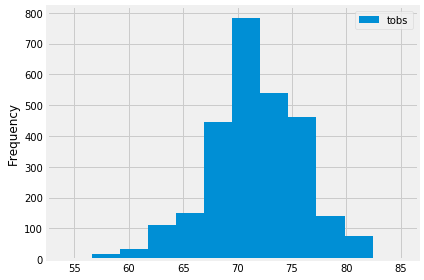

In [26]:
df2.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [62]:
results = session.query(
    Measurement.date, 
    Measurement.station, 
    Measurement.tobs, 
    Measurement.prcp
).filter(Measurement.date).all()

challenge = pd.DataFrame(results, 
                         columns=['date', 
                                  'station', 
                                  'temp_when_observed', 
                                  'precipipation'])

challenge.head()

,date,station,temp_when_observed,precipipation
0,2010-01-01,USC00519397,65.0,0.08
1,2010-01-02,USC00519397,63.0,0.00
2,2010-01-03,USC00519397,74.0,0.00
3,2010-01-04,USC00519397,76.0,0.00
4,2010-01-06,USC00519397,73.0,NaN


In [69]:
# Split review dates by year, month and day (strings)
time_split = challenge.date.str.split('-', n=2, expand=True)
challenge['year'] = time_split[0]
challenge['month'] = time_split[1]
challenge['day'] = time_split[2]

june = challenge[challenge.month == '06']
dec = challenge[challenge.month == '12']

In [75]:
june.describe()

,temp_when_observed,precipipation
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [115]:
june.groupby(['station', 'year']).describe()

temp_when_observed                                          \
                              count       mean       std   min    25%   50%   
station     year                                                              
USC00511918 2010               29.0  75.620690  3.569852  69.0  74.00  76.0   
            2011               30.0  73.433333  3.450970  68.0  71.00  73.5   
            2012               29.0  75.344828  2.991367  71.0  73.00  76.0   
            2013               30.0  74.933333  4.209458  66.0  73.00  74.0   
            2014               28.0  73.964286  5.102520  67.0  69.75  72.5   
...                             ...        ...       ...   ...    ...   ...   
USC00519523 2013               29.0  76.241379  2.444457  72.0  75.00  76.0   
            2014               27.0  76.740741  1.654658  74.0  76.00  76.0   
            2015               29.0  77.379310  1.916354  72.0  77.00  77.0   
            2016               29.0  77.620690  2.210588  72.0  77.00  78.0   
            2017               29.0  78.896552  1.759562  75.0  78.00  79.0   

                              precipipation                                \
                    75%   max         count      mean       std  min  25%   
station     year                                                            
USC00511918 2010  78.00  85.0          29.0  0.010345  0.021792  0.0  0.0   
            2011  75.75  80.0          30.0  0.031000  0.106814  0.0  0.0   
            2012  77.00  81.0          28.0  0.007500  0.019744  0.0  0.0   
            2013  78.75  81.0          30.0  0.009333  0.022884  0.0  0.0   
            2014  79.00  84.0          27.0  0.017037  0.035822  0.0  0.0   
...                 ...   ...           ...       ...       ...  ...  ...   
USC00519523 2013  78.00  81.0          29.0  0.059655  0.108446  0.0  0.0   
            2014  78.00  80.0          24.0  0.051667  0.113431  0.0  0.0   
            2015  79.00  81.0          28.0  0.023214  0.048691  0.0  0.0   
            2016  79.00  81.0          28.0  0.087857  0.124078  0.0  0.0   
            2017  80.00  82.0          28.0  0.031786  0.062423  0.0  0.0   

                                      
                   50%     75%   max  
station     year                      
USC00511918 2010  0.00  0.0000  0.09  
            2011  0.00  0.0175  0.58  
            2012  0.00  0.0100  0.10  
            2013  0.00  0.0000  0.08  
            2014  0.00  0.0250  0.17  
...                ...     ...   ...  
USC00519523 2013  0.00  0.0700  0.42  
            2014  0.00  0.0700  0.51  
            2015  0.00  0.0100  0.18  
            2016  0.03  0.1425  0.47  
            2017  0.00  0.0350  0.25  

[65 rows x 16 columns]

In [116]:
june[june.station = ]

2010    242
2011    227
2013    217
2014    215
2012    211
2015    203
2016    194
2017    191
Name: year, dtype: int64

In [123]:
sorted_stations = ['USC00519397', 'USC00513117', 'USC00514830', 'USC00517948',
       'USC00518838', 'USC00519523', 'USC00519281', 'USC00511918',
       'USC00516128']
stations = ['station_1', 'station_2', 'station_3', 
            'station_4', 'station_5', 'station_6', 
            'station_7', 'station_8', 'station_9',]

js = {}
ds = {}

for num, name in zip(sorted_stations, stations):
    j_value = june[june.station == num]
    d_value = dec[dec.station==num]
    js[name] = j_value
    ds[name] = d_value

In [128]:
js1 = js['station_1'].groupby('year').describe()
js2 = js['station_2'].groupby('year').describe()
js3 = js['station_3'].groupby('year').describe()
js4 = js['station_4'].groupby('year').describe()
js5 = js['station_5'].groupby('year').describe()
js6 = js['station_6'].groupby('year').describe()
js7 = js['station_7'].groupby('year').describe()
js8 = js['station_8'].groupby('year').describe()
js9 = js['station_9'].groupby('year').describe()
    
ds1 = ds['station_1'].groupby('year').describe()
ds2 = ds['station_2'].groupby('year').describe()
ds3 = ds['station_3'].groupby('year').describe()
ds4 = ds['station_4'].groupby('year').describe()
ds5 = ds['station_5'].groupby('year').describe()
ds6 = ds['station_6'].groupby('year').describe()
ds7 = ds['station_7'].groupby('year').describe()
ds8 = ds['station_8'].groupby('year').describe()
ds9 = ds['station_9'].groupby('year').describe()

In [129]:
js1

temp_when_observed                                                       \
                  count       mean       std   min    25%   50%    75%   max   
year                                                                           
2010               30.0  77.766667  1.072648  76.0  77.00  78.0  78.00  82.0   
2011               26.0  76.538462  1.771570  70.0  76.00  77.0  77.75  78.0   
2012               30.0  76.233333  1.165106  73.0  76.00  76.0  77.00  78.0   
2013               30.0  77.000000  1.414214  73.0  76.25  77.0  78.00  79.0   
2014               30.0  78.133333  2.029665  73.0  77.25  78.0  79.00  84.0   
2015               30.0  78.300000  0.987857  76.0  78.00  78.0  79.00  81.0   
2016               30.0  77.166667  2.364731  71.0  76.25  77.5  79.00  80.0   
2017               30.0  79.200000  1.399507  75.0  79.00  79.0  80.00  83.0   

     precipipation                                                    
             count      mean       std  min  25%   50%     75%   max  
year                                                                  
2010          30.0  0.001000  0.004026  0.0  0.0  0.00  0.0000  0.02  
2011          25.0  0.070400  0.204011  0.0  0.0  0.00  0.0300  0.89  
2012          28.0  0.010000  0.029814  0.0  0.0  0.00  0.0000  0.15  
2013          30.0  0.034667  0.091641  0.0  0.0  0.00  0.0175  0.37  
2014          30.0  0.045333  0.124284  0.0  0.0  0.01  0.0300  0.66  
2015          30.0  0.005667  0.012229  0.0  0.0  0.00  0.0000  0.04  
2016          30.0  0.009000  0.014704  0.0  0.0  0.00  0.0100  0.06  
2017          30.0  0.012333  0.024309  0.0  0.0  0.00  0.0150  0.08

In [101]:
dec.groupby(['station', 'year']).describe()

temp_when_observed                                          \
                              count       mean       std   min    25%   50%   
station     year                                                              
USC00511918 2010               31.0  70.000000  4.008325  63.0  66.50  70.0   
            2011               31.0  70.483871  3.472472  65.0  68.50  71.0   
            2012               30.0  70.566667  4.391868  61.0  68.00  72.0   
            2013               30.0  69.333333  4.412626  63.0  67.00  69.0   
            2014               30.0  68.000000  5.717487  57.0  64.00  68.5   
USC00513117 2010               31.0  70.967742  3.219564  64.0  69.00  71.0   
            2011               31.0  71.096774  1.640220  67.0  71.00  71.0   
            2012               31.0  70.064516  2.780114  65.0  68.00  71.0   
            2013               31.0  71.483871  2.501612  67.0  69.00  72.0   
            2014               31.0  70.354839  3.507595  64.0  67.50  70.0   
            2015               30.0  73.066667  2.970352  67.0  70.50  73.5   
            2016               31.0  70.516129  2.336250  63.0  69.00  71.0   
USC00514830 2010               30.0  69.233333  3.125902  62.0  68.00  70.0   
            2011               26.0  70.653846  1.598557  66.0  70.00  70.5   
            2012               20.0  74.300000  2.386365  68.0  73.00  74.5   
            2013               27.0  74.333333  1.921538  71.0  73.00  74.0   
            2014               23.0  74.173913  2.516350  70.0  72.00  74.0   
            2015               24.0  76.791667  1.768791  72.0  76.00  77.0   
            2016               28.0  74.214286  2.114450  69.0  72.75  74.5   
USC00516128 2010               31.0  69.483871  4.073254  61.0  67.50  69.0   
            2011               30.0  69.166667  1.763291  65.0  68.00  69.0   
            2012               31.0  68.806452  3.515863  62.0  66.50  69.0   
            2013               29.0  70.068966  3.442705  64.0  68.00  70.0   
            2014               27.0  68.222222  2.665064  62.0  66.50  68.0   
            2015               28.0  70.642857  1.615074  67.0  69.75  71.0   
            2016               30.0  68.666667  3.055050  60.0  67.00  69.0   
USC00517948 2010               12.0  69.500000  3.424511  66.0  66.75  68.5   
            2011               12.0  70.916667  2.020726  69.0  69.00  71.0   
            2012               12.0  73.166667  2.790677  68.0  72.50  73.5   
            2013               20.0  70.950000  2.282081  67.0  70.00  71.0   
            2014               20.0  74.550000  3.347819  64.0  74.00  75.0   
            2015               13.0  73.384615  4.925080  65.0  71.00  74.0   
            2016               20.0  70.150000  2.390221  66.0  68.00  70.0   
USC00518838 2010               13.0  72.230769  3.789324  63.0  71.00  73.0   
            2012                2.0  73.500000  0.707107  73.0  73.25  73.5   
            2013                4.0  72.500000  0.577350  72.0  72.00  72.5   
USC00519281 2010               31.0  69.000000  4.366539  58.0  66.50  70.0   
            2011               31.0  70.129032  2.186960  65.0  69.00  70.0   
            2012               31.0  70.129032  3.461617  62.0  68.50  71.0   
            2013               31.0  69.548387  3.500845  63.0  67.00  70.0   
            2014               31.0  66.709677  3.698590  59.0  63.50  68.0   
            2015               31.0  73.387097  2.577821  67.0  72.50  74.0   
            2016               31.0  70.419355  3.364265  62.0  68.50  70.0   
USC00519397 2010               25.0  70.640000  3.784618  64.0  68.00  71.0   
            2011               31.0  71.870968  2.390843  63.0  71.00  73.0   
            2012               30.0  71.100000  3.575298  64.0  69.00  72.5   
            2013               31.0  70.935484  3.043413  65.0  69.00  71.0   
            2014               31.0  69.387097  4.758693  56.0  66.

In [99]:
june.groupby(['station', 'year']).sum()

temp_when_observed  precipipation
station     year                                   
USC00511918 2010              2193.0           0.30
            2011              2203.0           0.93
            2012              2185.0           0.21
            2013              2248.0           0.28
            2014              2071.0           0.46
...                              ...            ...
USC00519523 2013              2211.0           1.73
            2014              2072.0           1.24
            2015              2244.0           0.65
            2016              2251.0           2.46
            2017              2288.0           0.89

[65 rows x 2 columns]

In [ ]:
dec.groupby(['station', 'year']).sum()

In [95]:
june.groupby(['station', 'year']).mean()

temp_when_observed  precipipation
station     year                                   
USC00511918 2010           75.620690       0.010345
            2011           73.433333       0.031000
            2012           75.344828       0.007500
            2013           74.933333       0.009333
            2014           73.964286       0.017037
...                              ...            ...
USC00519523 2013           76.241379       0.059655
            2014           76.740741       0.051667
            2015           77.379310       0.023214
            2016           77.620690       0.087857
            2017           78.896552       0.031786

[65 rows x 2 columns]

In [83]:
june.groupby(['station', 'year']).max()

,date,temp_when_observed,precipipation,year,month,day
station,,,,,,
USC00511918,2015-06-26,85.0,0.58,2015,06,30
USC00513117,2017-06-30,83.0,4.43,2017,06,30
USC00514830,2017-06-30,81.0,3.60,2017,06,30
USC00516128,2017-06-30,79.0,2.80,2017,06,30
USC00517948,2017-06-30,82.0,1.71,2017,06,30
USC00518838,2012-06-29,78.0,0.82,2012,06,30
USC00519281,2017-06-30,82.0,1.39,2017,06,30
USC00519397,2017-06-30,84.0,0.89,2017,06,30
USC00519523,2017-06-30,82.0,0.51,2017,06,30


In [85]:
june.groupby(['station', 'year']).min()

,date,temp_when_observed,precipipation,year,month,day
station,,,,,,
USC00511918,2010-06-01,66.0,0.0,2010,06,01
USC00513117,2010-06-01,68.0,0.0,2010,06,01
USC00514830,2010-06-01,67.0,0.0,2010,06,01
USC00516128,2010-06-01,66.0,0.0,2010,06,01
USC00517948,2010-06-01,64.0,0.0,2010,06,01
USC00518838,2010-06-01,67.0,0.0,2010,06,01
USC00519281,2010-06-01,65.0,0.0,2010,06,01
USC00519397,2010-06-01,70.0,0.0,2010,06,01
USC00519523,2010-06-01,71.0,0.0,2010,06,01


In [87]:
dec.groupby(['station', 'year']).count()

,date,temp_when_observed,precipipation,year,month,day
station,,,,,,
USC00511918,152,152,151,152,152,152
USC00513117,216,216,216,216,216,216
USC00514830,178,178,147,178,178,178
USC00516128,206,206,197,206,206,206
USC00517948,109,109,55,109,109,109
USC00518838,19,19,11,19,19,19
USC00519281,217,217,217,217,217,217
USC00519397,210,210,207,210,210,210
USC00519523,210,210,204,210,210,210


In [88]:
dec.groupby(['station', 'year']).sum()

,temp_when_observed,precipipation
station,,
USC00511918,10592.0,20.86
USC00513117,15351.0,43.90
USC00514830,13034.0,22.78
USC00516128,14274.0,99.88
USC00517948,7830.0,8.40
USC00518838,1376.0,7.02
USC00519281,15169.0,53.15
USC00519397,14933.0,15.59
USC00519523,15211.0,33.05


In [89]:
dec.groupby(['station', 'year']).mean()

,temp_when_observed,precipipation
station,,
USC00511918,69.684211,0.138146
USC00513117,71.069444,0.203241
USC00514830,73.224719,0.154966
USC00516128,69.291262,0.507005
USC00517948,71.834862,0.152727
USC00518838,72.421053,0.638182
USC00519281,69.903226,0.244931
USC00519397,71.109524,0.075314
USC00519523,72.433333,0.162010


In [90]:
dec.groupby(['station', 'year']).max()

,date,temp_when_observed,precipipation,year,month,day
station,,,,,,
USC00511918,2014-12-31,81.0,4.00,2014,12,31
USC00513117,2016-12-31,80.0,4.94,2016,12,31
USC00514830,2016-12-31,79.0,2.55,2016,12,31
USC00516128,2016-12-31,83.0,6.42,2016,12,31
USC00517948,2016-12-30,82.0,2.80,2016,12,30
USC00518838,2013-12-23,78.0,2.50,2013,12,23
USC00519281,2016-12-31,79.0,3.14,2016,12,31
USC00519397,2016-12-31,77.0,2.01,2016,12,31
USC00519523,2016-12-30,79.0,4.95,2016,12,31


In [100]:
dec.groupby(['station', 'year']).min()

date  temp_when_observed  precipipation month day
station     year                                                         
USC00511918 2010  2010-12-01                63.0           0.00    12  01
            2011  2011-12-01                65.0           0.00    12  01
            2012  2012-12-02                61.0           0.00    12  02
            2013  2013-12-01                63.0           0.00    12  01
            2014  2014-12-01                57.0           0.00    12  01
USC00513117 2010  2010-12-01                64.0           0.00    12  01
            2011  2011-12-01                67.0           0.00    12  01
            2012  2012-12-01                65.0           0.00    12  01
            2013  2013-12-01                67.0           0.00    12  01
            2014  2014-12-01                64.0           0.00    12  01
            2015  2015-12-02                67.0           0.00    12  02
            2016  2016-12-01                63.0           0.01    12  01
USC00514830 2010  2010-12-01                62.0           0.00    12  01
            2011  2011-12-01                66.0           0.00    12  01
            2012  2012-12-01                68.0           0.00    12  01
            2013  2013-12-02                71.0           0.00    12  02
            2014  2014-12-01                70.0           0.00    12  01
            2015  2015-12-01                72.0           0.00    12  01
            2016  2016-12-01                69.0           0.00    12  01
USC00516128 2010  2010-12-01                61.0           0.00    12  01
            2011  2011-12-01                65.0           0.00    12  01
            2012  2012-12-01                62.0           0.00    12  01
            2013  2013-12-01                64.0           0.00    12  01
            2014  2014-12-01                62.0           0.00    12  01
            2015  2015-12-01                67.0           0.00    12  01
            2016  2016-12-01                60.0           0.00    12  01
USC00517948 2010  2010-12-01                66.0           0.00    12  01
            2011  2011-12-01                69.0           0.00    12  01
            2012  2012-12-03                68.0           0.00    12  03
            2013  2013-12-02                67.0           0.00    12  02
            2014  2014-12-01                64.0           0.00    12  01
            2015  2015-12-01                65.0           0.11    12  01
            2016  2016-12-01                66.0           0.02    12  01
USC00518838 2010  2010-12-02                63.0           0.02    12  02
            2012  2012-12-03                73.0            NaN    12  03
            2013  2013-12-17                72.0           0.16    12  17
USC00519281 2010  2010-12-01                58.0           0.00    12  01
            2011  2011-12-01                65.0           0.00    12  01
            2012  2012-12-01                62.0           0.00    12  01
            2013  2013-12-01                63.0           0.00    12  01
            2014  2014-12-01                59.0           0.00    12  01
            2015  2015-12-01                67.0           0.00    12  01
            2016  2016-12-01                62.0           0.00    12  01
USC00519397 2010  2010-12-01                64.0           0.00    12  01
            2011  2011-12-01                63.0           0.00    12  01
            2012  2012-12-01                64.0           0.00    12  01
            2013  2013-12-01                65.0           0.00    12  01
            2014  2014-12-01                56.0           0.00    12  01
            2015  2015-12-01                66.0           0.00    12  01
            2016  2016-12-01                62.0           0.00    12  01
USC00519523 2010  2010-12-01                61.0           0.00    12  01
            2011  2011-12-01                65.0           0.00    12  01
            2012  2012-12-01